In [3]:
from pyscf import gto, dft, scf, ao2mo, lib, tddft,fci
from pyscf.fci import addons
import numpy as np
from pyscf.dft import numint
import scipy
from functools import reduce
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import re
from pyscf import tools
from SF_XTDA import *

/Users/zhendongli/.local/lib/python3.9/site-packages/pyscf/dft/libxc.py:771: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


In [17]:
mol = gto.M(                 
    atom = 'O 0 0 0; O 0 0 1.517',
    basis = 'aug-cc-pvtz',
    charge = 0,
    spin = 2, 
    verbose = 5,
    #cart=True,
    symmetry=False, #'D2h'
)


mf = dft.ROKS(mol)
#mf.irrep_nelec = {'A1': (4,2), 'B1':(1,1), 'B2':(1,1)}
mf.xc = 'svwn'
mf.kernel()

System: uname_result(system='Darwin', node='Zhendongs-Macbook-Pro.local', release='23.1.0', version='Darwin Kernel Version 23.1.0: Mon Oct  9 21:32:11 PDT 2023; root:xnu-10002.41.9~7/RELEASE_ARM64_T6030', machine='arm64')  Threads 1
Python 3.9.13 | packaged by conda-forge | (main, May 27 2022, 17:01:00) 
[Clang 13.0.1 ]
numpy 1.24.2  scipy 1.9.3
Date: Fri Sep  5 17:32:55 2025
PySCF version 2.4.0
PySCF path  /Users/zhendongli/.local/lib/python3.9/site-packages/pyscf

[CONFIG] conf_file None
[INPUT] verbose = 5
[INPUT] max_memory = 4000 
[INPUT] num. atoms = 2
[INPUT] num. electrons = 16
[INPUT] charge = 0
[INPUT] spin (= nelec alpha-beta = 2S) = 2
[INPUT] symmetry False subgroup None
[INPUT] Mole.unit = angstrom
[INPUT] Symbol           X                Y                Z      unit          X                Y                Z       unit  Magmom
[INPUT]  1 O      0.000000000000   0.000000000000   0.000000000000 AA    0.000000000000   0.000000000000   0.000000000000 Bohr   0.0
[INPUT]  2 

-149.2530152101305

# SF-TDA

In [28]:
nstates = 10
sf_tda = SA_SF_TDA(mf,SA=0)

In [35]:
tmp_e, values = sf_tda.kernel(nstates=nstates,remove=True)
print(tmp_e) #  in eV
#sf_tda.analyse()

nelec by numeric integration = [8.99999888 6.9999996 ]
    CPU time for vxc      0.21 sec, wall time      0.20 sec
nelec by numeric integration = [8.99999888 6.9999996 ]
    CPU time for vxc      0.17 sec, wall time      0.17 sec
omega alpha hyb 0.0 0.0 0.0
LDA
The row of A matrix  765
Perform SF-TDA calculating...
[0.92170587 0.92170934 1.90172622 3.28497061 4.19143943 4.19144213
 5.04035784 5.04596052 5.04596052 5.76830493]


In [36]:
tmp_e, values = sf_tda.kernel(nstates=nstates,remove=False)
print(tmp_e) #  in eV
#sf_tda.analyse()

nelec by numeric integration = [8.99999888 6.9999996 ]
    CPU time for vxc      0.21 sec, wall time      0.21 sec
nelec by numeric integration = [8.99999888 6.9999996 ]
    CPU time for vxc      0.18 sec, wall time      0.18 sec
omega alpha hyb 0.0 0.0 0.0
LDA
The row of A matrix  765
Perform SF-TDA calculating...
[-0.05146954  0.92170587  0.92170934  1.90172622  3.28497061  4.19143943
  4.19144213  5.04035784  5.04596052  5.04596052]


# SA-SF-TDA

In [37]:
nstates = 10
sf_tda = SA_SF_TDA(mf,SA=3)

In [41]:
tmp_e, values = sf_tda.kernel(nstates=nstates,foo=0.5,fglobal=1.0)
print(tmp_e) #  in eV
#sf_tda.analyse()

nelec by numeric integration = [8.99999888 6.9999996 ]
    CPU time for vxc      0.21 sec, wall time      0.21 sec
nelec by numeric integration = [8.99999888 6.9999996 ]
    CPU time for vxc      0.17 sec, wall time      0.17 sec
omega alpha hyb 0.0 0.0 0.0
LDA
The row of A matrix  765
[-1.89553287 -0.04886126  0.77147555  0.77147916  1.85756306  5.71274977
  5.71274977  6.47198776  6.47198776  9.13931474]


In [40]:
tmp_e, values = sf_tda.kernel(nstates=nstates,foo=1.0,fglobal=0.5)
print(tmp_e) #  in eV
#sf_tda.analyse()

nelec by numeric integration = [8.99999888 6.9999996 ]
    CPU time for vxc      0.21 sec, wall time      0.20 sec
nelec by numeric integration = [8.99999888 6.9999996 ]
    CPU time for vxc      0.17 sec, wall time      0.17 sec
omega alpha hyb 0.0 0.0 0.0
LDA
The row of A matrix  765
[-0.05229117  0.760009    0.76001257  0.79588061  1.85198095  5.38654345
  5.38654345  6.13105374  6.13105374  6.96827847]


In [39]:
tmp_e, values = sf_tda.kernel(nstates=nstates,foo=1.0,fglobal=1.0)
print(tmp_e) #  in eV
#sf_tda.analyse()

nelec by numeric integration = [8.99999888 6.9999996 ]
    CPU time for vxc      0.21 sec, wall time      0.21 sec
nelec by numeric integration = [8.99999888 6.9999996 ]
    CPU time for vxc      0.18 sec, wall time      0.18 sec
omega alpha hyb 0.0 0.0 0.0
LDA
The row of A matrix  765
[-1.89553287 -0.36146291  0.47634727  0.47635081  1.7349381   5.71274977
  5.71274977  6.47198776  6.47198776  9.13931474]


In [21]:
foolst = np.linspace(0,1,11)

wlst = []
for foo in foolst:
    tmp_e, values = sf_tda.kernel(nstates=nstates,foo=1.0,fglobal=foo)
    w = tmp_e - tmp_e[0]
    wlst.append(w)
wlst = np.array(wlst).T

nelec by numeric integration = [8.99999888 6.9999996 ]
    CPU time for vxc      0.18 sec, wall time      0.18 sec
nelec by numeric integration = [8.99999888 6.9999996 ]
    CPU time for vxc      0.18 sec, wall time      0.18 sec
omega alpha hyb 0.0 0.0 0.0
LDA
The row of A matrix  765
nelec by numeric integration = [8.99999888 6.9999996 ]
    CPU time for vxc      0.17 sec, wall time      0.17 sec
nelec by numeric integration = [8.99999888 6.9999996 ]
    CPU time for vxc      0.17 sec, wall time      0.17 sec
omega alpha hyb 0.0 0.0 0.0
LDA
The row of A matrix  765
nelec by numeric integration = [8.99999888 6.9999996 ]
    CPU time for vxc      0.18 sec, wall time      0.18 sec
nelec by numeric integration = [8.99999888 6.9999996 ]
    CPU time for vxc      0.18 sec, wall time      0.18 sec
omega alpha hyb 0.0 0.0 0.0
LDA
The row of A matrix  765
nelec by numeric integration = [8.99999888 6.9999996 ]
    CPU time for vxc      0.18 sec, wall time      0.18 sec
nelec by numeric integra

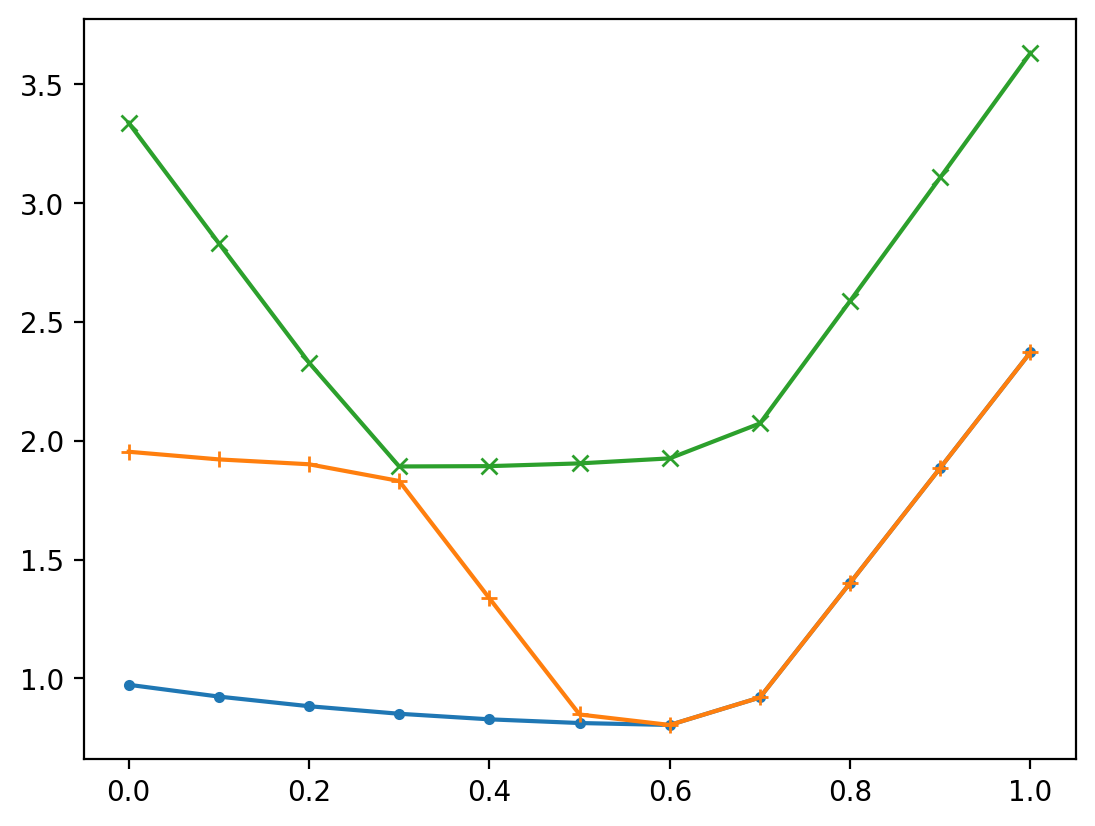

In [22]:
import matplotlib.pyplot as plt

mk = [0,0,'.','+','x']
for i in [2,3,4]:
    plt.plot(foolst,wlst[i],marker=mk[i],ls='-')

In [23]:
wlst.T[0]

array([0.        , 0.97317541, 0.97317889, 1.95319576, 3.33644016,
       4.24290897, 4.24291167, 5.09182738, 5.09743007, 5.09743007])

In [24]:
foolst[5],wlst.T[5]

(0.5,
 array([0.        , 0.81230017, 0.81230374, 0.84817178, 1.90427212,
        5.43883462, 5.43883462, 6.18334491, 6.18334491, 7.02056965]))

In [25]:
foolst[7],wlst.T[7]

(0.7000000000000001,
 array([0.        , 0.11662241, 0.91970987, 0.91971343, 2.0722933 ,
        5.77887056, 5.77887056, 6.52961423, 6.52961423, 8.2013994 ]))

In [26]:
wlst.T[-1]

array([ 0.        ,  1.53406996,  2.37188014,  2.37188367,  3.63047097,
        7.60828264,  7.60828264,  8.36752062,  8.36752062, 11.03484761])

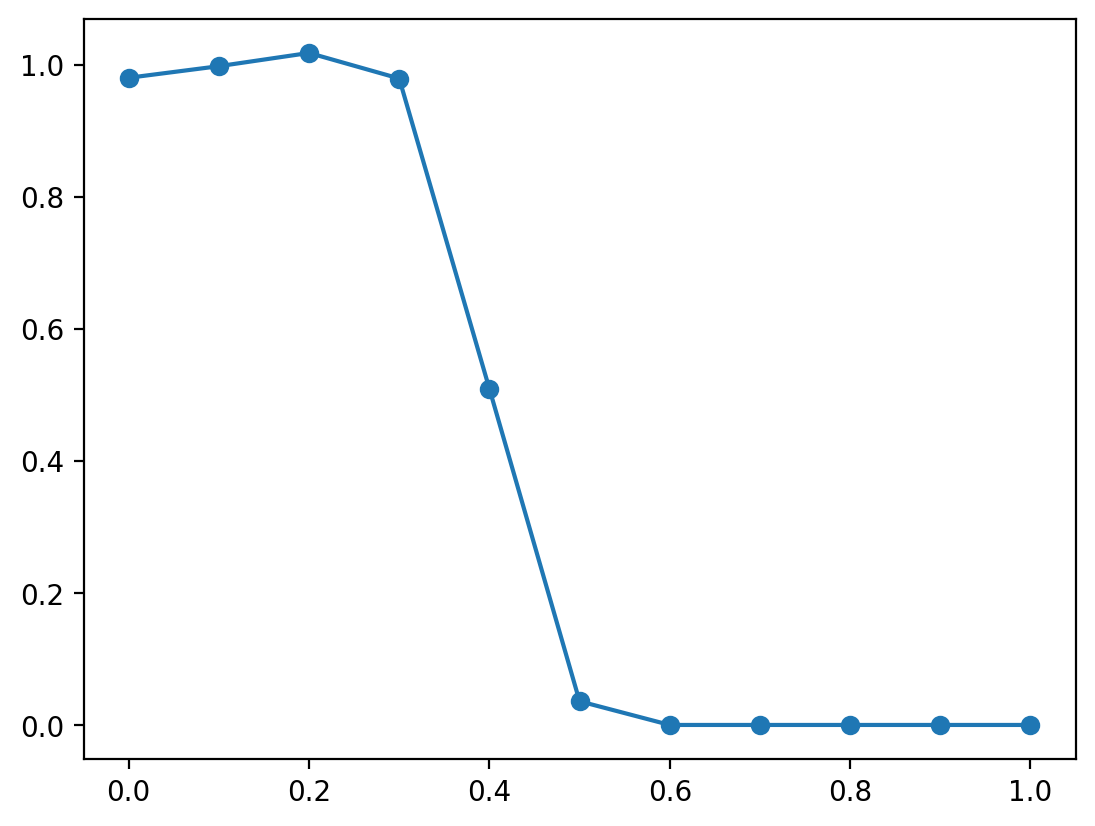

In [27]:
import matplotlib.pyplot as plt

plt.plot(foolst,wlst[3]-wlst[2],'o-')